In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d tongpython/cat-and-dog

 94% 205M/218M [00:00<00:00, 207MB/s]
100% 218M/218M [00:00<00:00, 232MB/s]


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-and-dog.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten,BatchNormalization,Dropout

In [11]:
# Generators: used for creating batches of data used for larged siz data
train_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/training_set/training_set',
    labels='inferred',
    label_mode='int',
    batch_size =32,
    image_size =(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/test_set/test_set',
    labels='inferred',
    label_mode='int',
    batch_size =32,
    image_size =(256,256)
)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [12]:
# Normalizing (values of image betwee 0 and 1)
def process(image,label):
  image= tf.cast(image/255.,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [22]:
# Create CNN model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [24]:
model.compile(optimizer='adam',loss= 'binary_crossentropy',metrics= ['accuracy'])

In [25]:
history = model.fit(train_ds,epochs=10, validation_data= validation_ds)

Epoch 1/10
251/251 [==============================] - 30s 107ms/step - loss: 1.5522 - accuracy: 0.5686 - val_loss: 0.7709 - val_accuracy: 0.5398
Epoch 2/10
251/251 [==============================] - 26s 104ms/step - loss: 0.6256 - accuracy: 0.6493 - val_loss: 0.6068 - val_accuracy: 0.6703
Epoch 3/10
251/251 [==============================] - 28s 112ms/step - loss: 0.5592 - accuracy: 0.7109 - val_loss: 0.9018 - val_accuracy: 0.5833
Epoch 4/10
251/251 [==============================] - 28s 107ms/step - loss: 0.5389 - accuracy: 0.7349 - val_loss: 0.6186 - val_accuracy: 0.7029
Epoch 5/10
251/251 [==============================] - 28s 112ms/step - loss: 0.4606 - accuracy: 0.7834 - val_loss: 0.5721 - val_accuracy: 0.7281
Epoch 6/10
251/251 [==============================] - 27s 104ms/step - loss: 0.4182 - accuracy: 0.8136 - val_loss: 0.6567 - val_accuracy: 0.7113
Epoch 7/10
251/251 [==============================] - 29s 112ms/step - loss: 0.3519 - accuracy: 0.8427 - val_loss: 0.5427 - val_ac

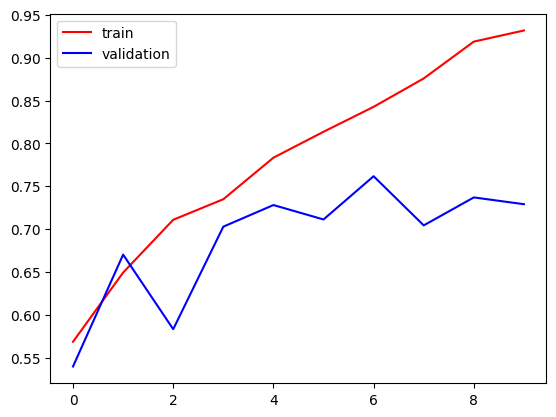

In [27]:
import matplotlib.pyplot as plt
# plotting graph between validation acc. and training aac., 
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()
# output shows that with each epoch trainig acc.is increasing but validation acc. is stable between 70 80, i.e  overfitting is happenning

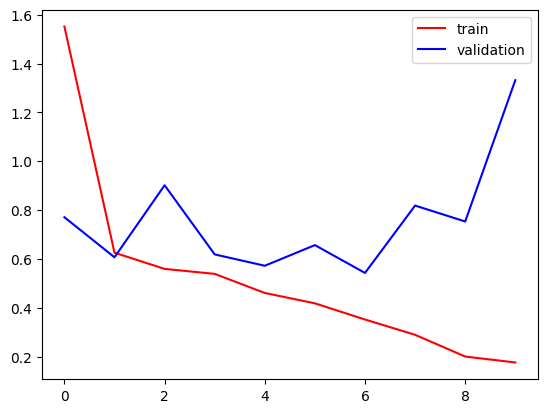

In [26]:
# Plot between validation Loss and training Loss

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [39]:
# testing on random images
import cv2
test_img = cv2.imread('/content/dog.jpg')

In [40]:
test_img.shape

(183, 275, 3)

In [41]:
test_img = cv2.resize(test_img,(256,256))

In [42]:
test_input = test_img.reshape((1,256,256,3))

In [43]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[4.6307714e-28]], dtype=float32)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')